## Table of Content  
1. [Data Cleaning](#1-Data-Cleaning)  
   1.1 [Import Dependencies](#1.1-Import-Dependencies)  
   1.2 [Dataset Attributes](#1.2-Dataset-Attributes)  
   1.3 [Standardize Categorical Values](#1.3-Standardize-Categorical-Values)  
   1.4 [Inspecting Missing Values](#1.4-Inspecting-Missing-Values)  
   1.5 [Replacing the Missing Values](#1.5-Replacing-the-Missing-Values)  
   1.6 [Categorizing the data in different types](#1.6-Categories)  
   1.7 [Duplicate Check in Dataset](#1.7-Duplicate-check)  
   1.8 [Outlier Detection](#1.8-Outlier-Detection)  
   1.9 [Treatment of Outliers](#1.9-Treatment-of-Outliers)  
   

#### 1. Data Cleaning  
##### 1.1 Import Dependencies and Loading Dataset

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

df = pd.read_csv("healthcare-dataset-stroke-data.csv", sep=r",")

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [70]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [71]:
# Removing id column  
df.drop(columns = ['id'],inplace = True)

#### 1.2 Dataset Attributes

In [72]:
df.shape

(5110, 11)

There are 5110 rows and 12 columns

In [73]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [74]:
df.dtypes
print(df['gender'].unique())
print(df['ever_married'].unique())
print(df['work_type'].unique())
print(df['Residence_type'].unique())
print(df['smoking_status'].unique())
print(df['bmi'].unique())

['Male' 'Female' 'Other']
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
[36.6  nan 32.5 34.4 24.  29.  27.4 22.8 24.2 29.7 36.8 27.3 28.2 30.9
 37.5 25.8 37.8 22.4 48.9 26.6 27.2 23.5 28.3 44.2 25.4 22.2 30.5 26.5
 33.7 23.1 32.  29.9 23.9 28.5 26.4 20.2 33.6 38.6 39.2 27.7 31.4 36.5
 33.2 32.8 40.4 25.3 30.2 47.5 20.3 30.  28.9 28.1 31.1 21.7 27.  24.1
 45.9 44.1 22.9 29.1 32.3 41.1 25.6 29.8 26.3 26.2 29.4 24.4 28.  28.8
 34.6 19.4 30.3 41.5 22.6 56.6 27.1 31.3 31.  31.7 35.8 28.4 20.1 26.7
 38.7 34.9 25.  23.8 21.8 27.5 24.6 32.9 26.1 31.9 34.1 36.9 37.3 45.7
 34.2 23.6 22.3 37.1 45.  25.5 30.8 37.4 34.5 27.9 29.5 46.  42.5 35.5
 26.9 45.5 31.5 33.  23.4 30.7 20.5 21.5 40.  28.6 42.2 29.6 35.4 16.9
 26.8 39.3 32.6 35.9 21.2 42.4 40.5 36.7 29.3 19.6 18.  17.6 19.1 50.1
 17.7 54.6 35.  22.  39.4 19.7 22.5 25.2 41.8 60.9 23.7 24.5 31.2 16.
 31.6 25.1 24.8 18.3 20.  19.5 36.  35.3 40.

There are different types of data types in the dataset and some are **Binary**, **Categorical**, **Continues**

#### 1.3 Standardize Categorical Values  

Converting categorical values into continuous values by assigning them values from 1 to 5 

In [75]:
pd.set_option('future.no_silent_downcasting', True)
df['gender'] = df['gender'].replace({'Female':0, 'Male':1, 'Other': 0}).astype('int64')
df['ever_married'] = df['ever_married'].replace({'Yes':1, 'No':0}).astype('int64')
df['work_type'] = df['work_type'].replace({'Private':1, 'Self-employed':2, 'Govt_job':3, 'children':4, 'Never_worked':5}).astype('int64')
df['Residence_type'] = df['Residence_type'].replace({'Urban':0, 'Rural':1}).astype('int64')
df['smoking_status'] = df['smoking_status'].replace({'formerly smoked':1, 'never smoked':2, 'smokes':3, 'Unknown':4}).astype('int64')
#df['bmi'] = df['bmi'].fillna(0)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,0,228.69,36.6,1,1
1,0,61.0,0,0,1,2,1,202.21,NaN,2,1
2,1,80.0,0,1,1,1,1,105.92,32.5,2,1
3,0,49.0,0,0,1,1,0,171.23,34.4,3,1
4,0,79.0,1,0,1,2,1,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,1,0,83.75,NaN,2,0
5106,0,81.0,0,0,1,2,0,125.20,40.0,2,0
5107,0,35.0,0,0,1,2,1,82.99,30.6,2,0
5108,1,51.0,0,0,1,1,1,166.29,25.6,1,0


#### 1.4 Inspecting Missing Values  
There are some missing values in bmi column as seen above

In [76]:
print(np.any(np.isnan(df)))
print(np.all(np.isfinite(df)))

True
False


In [77]:
l1 = [i for i in range(len(df.isnull()['bmi'])) if df.isnull().loc[i, 'bmi'] == True]
print('Total Number of Missing Values in bmi feature :', len(l1))

Total Number of Missing Values in bmi feature : 201


#### 1.5 Replacing the Missing Values  
*As seen in the describe table, the mean and median of bmi are very close to each other*  
*So replacing the missing values with mean values*

In [78]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

In [79]:
df.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.413894,43.226614,0.097456,0.054012,0.656164,1.837965,0.491977,106.147677,28.893237,2.585519,0.048728
std,0.492578,22.612647,0.296607,0.226063,0.475034,1.118698,0.499985,45.283560,7.698018,1.092522,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000,0.000000,55.120000,10.300000,1.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,1.000000,0.000000,77.245000,23.800000,2.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,1.000000,0.000000,91.885000,28.400000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,4.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,5.000000,1.000000,271.740000,97.600000,4.000000,1.000000


#### 1.6 Categorizing the data in different types
- **Categorical Features:** gender, ever_married, work_type, Residence_type, smoking_status
- **Binary Numerical Features:** hypertension,heart_disease, stroke
- **Continous Numerical Features:** age, avg_glucose_level, bmi

We can move gender, ever_married and Residence_type to Binary Numerical like this  
- **Categorical Features:** work_type, smoking_status  
- **Binary Numerical Features:** hypertension,heart_disease, stroke, gender, ever_married, Residence_type
- **Continous Numerical Features:** age, avg_glucose_level, bmi

#### 1.7 Duplicate Check in Dataset  

In [81]:
duplicates = df.duplicated()
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 0


There are no duplicates rows in the dataset 

#### 1.8 Outlier Detection

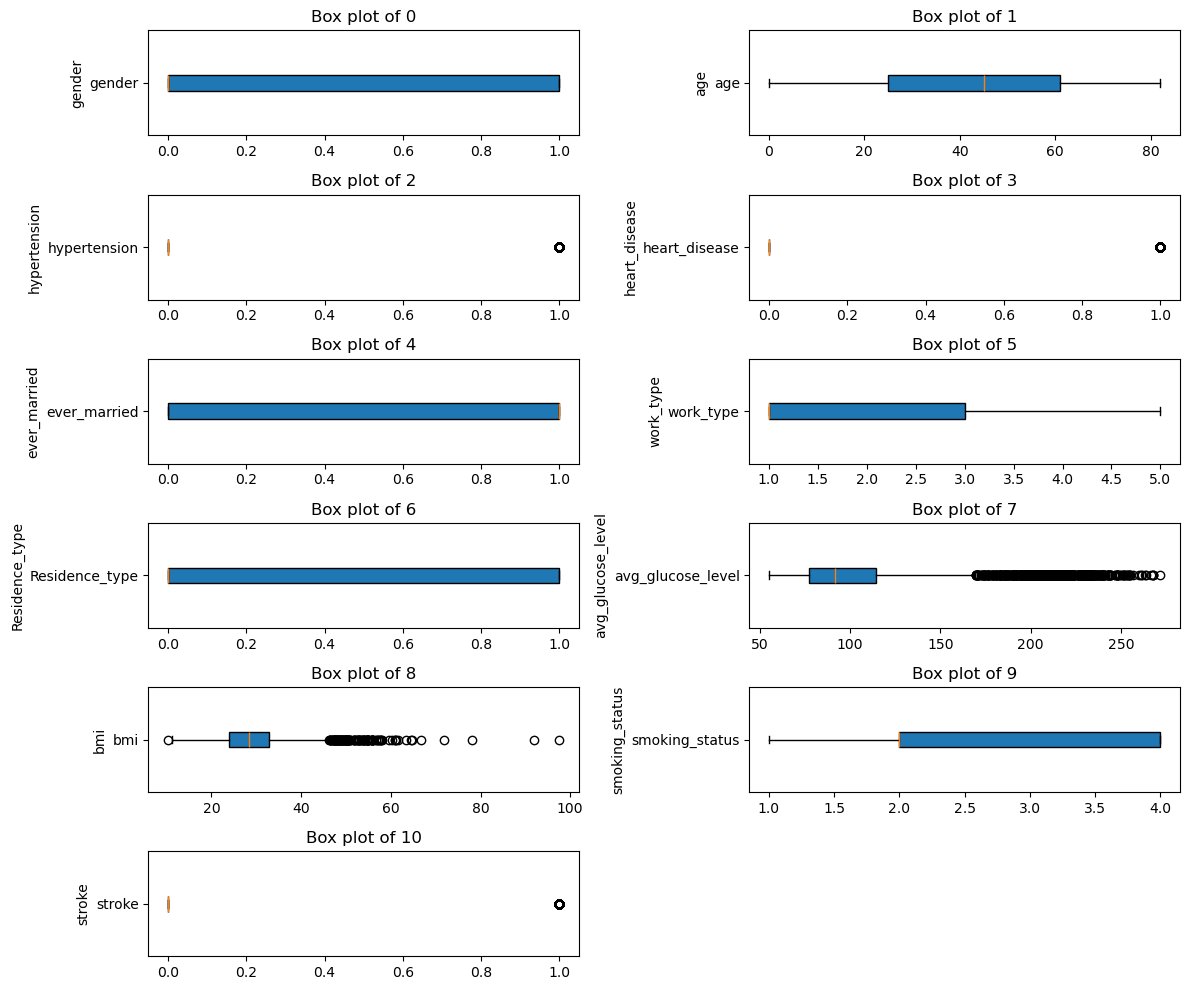

In [98]:
n_plots = len(df.columns)
n_cols = 2
n_rows = int(math.ceil(n_plots/n_cols))
gs = gridspec.GridSpec(n_rows, n_cols)
#fig = plt.figure(figsize=(12,8))
fig = plt.figure(figsize=(12,10))
for i in range(n_plots):
    ax = fig.add_subplot(gs[i])
    #fig, ax = plt.subplots(figsize=(6,4))
    ax.boxplot(df[df.columns[i]], patch_artist=True, tick_labels=[df.columns[i]], vert=False)
    ax.set_title("Box plot of %s" % i)
    ax.set_ylabel(df.columns[i])
plt.tight_layout()
plt.show()

<Axes: >

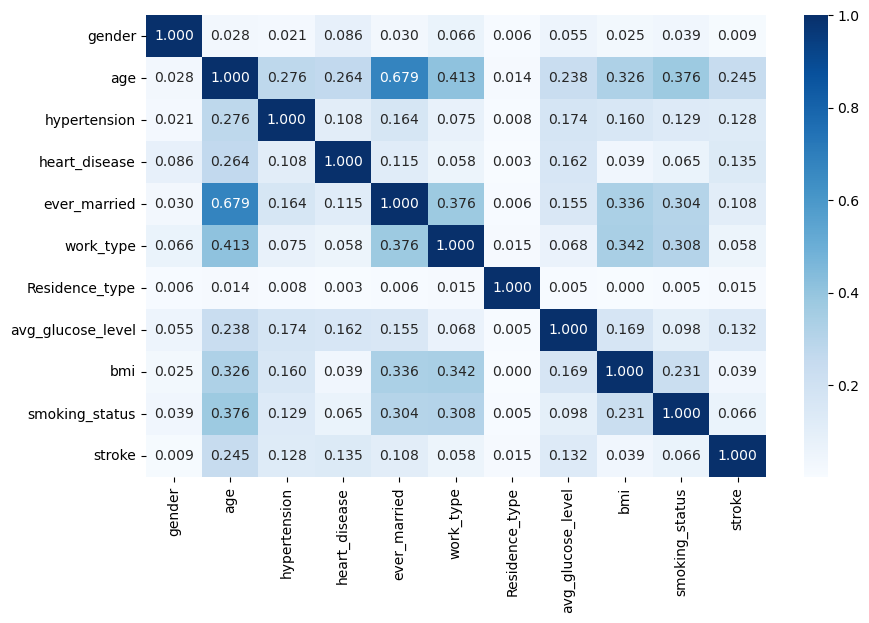

In [82]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(abs(df.corr()), annot=True, fmt='.3f', cmap='Blues')

**Key Observations**  
- Highly Correlated Pairs
  - age and ever_married 0.679: Older individuals are more likely to be married
  - work_type and ever_married 0.578: Possibly due to age/work role influencing marital status
- Low to Moderate Correlation
  - age 0.245: moderate positive correlation, as age increases stroke likelihood slightly increases
  - hypertension 0.131
  - heart_disease 0.134
  - avg_glucose_level 0.131: slight correlation, hinting at diabetes being a risk factor    
- Others are very weak to find correlations  
  - Either they don't impact the stroke strongly or need more information to find correlation  

In [83]:
stroke_counts = df.groupby(['stroke'])['stroke'].count()

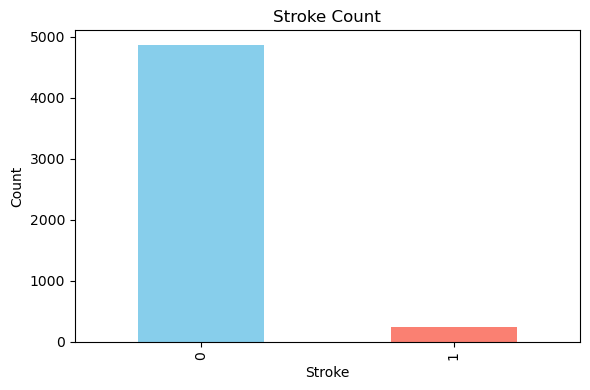

In [84]:
plt.figure(figsize=(6, 4))
stroke_counts.plot(kind='bar', color=['skyblue', 'salmon'])

plt.title('Stroke Count')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

**The count of patients that have stroke to patients that don't have a stroke is very high, one can say they are highly unbalanced**

In [85]:
df[['age', 'avg_glucose_level', 'bmi']].describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.698018
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.800000
50%,45.000000,91.885000,28.400000
75%,61.000000,114.090000,32.800000
max,82.000000,271.740000,97.600000


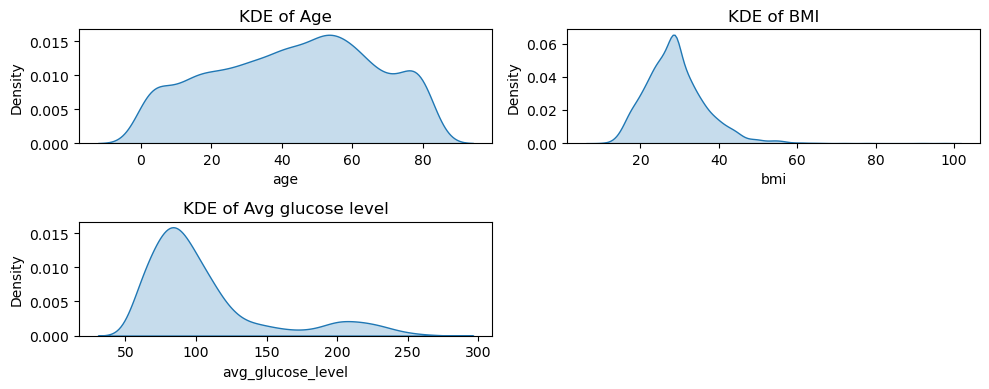

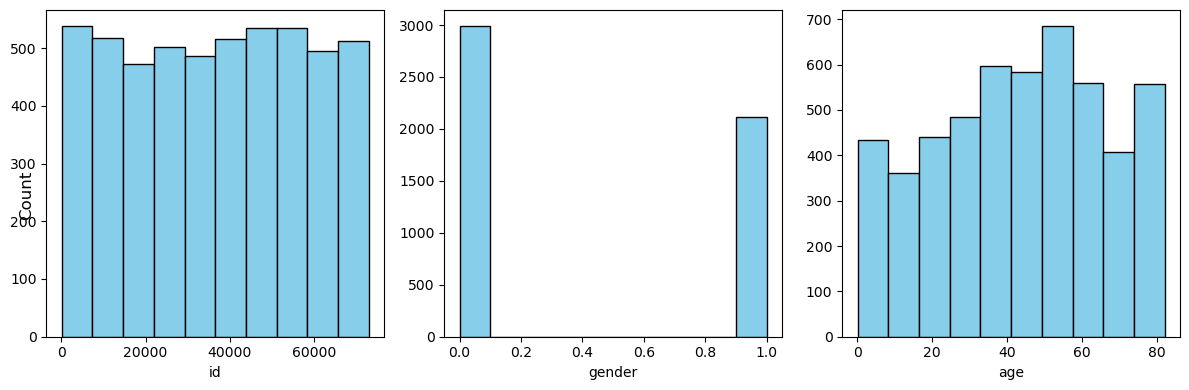

In [26]:
plt.figure(figsize=(10, 4))

# KDE for age
plt.subplot(2, 2, 1)
sns.kdeplot(data=df, x='age', fill=True)
plt.title('KDE of Age')

# KDE for bmi
plt.subplot(2, 2, 2)
sns.kdeplot(data=df, x='bmi', fill=True)
plt.title('KDE of BMI')

plt.subplot(2,2,3)
sns.kdeplot(data=df, x='avg_glucose_level', fill=True)
plt.title("KDE of Avg glucose level")

plt.tight_layout()
plt.show()

import math
continuous = df[['age','bmi','avg_glucose_level']]
n_plots = len(continuous.columns)
n_cols = 3
n_rows = int(math.ceil(n_plots/n_cols))
gs = gridspec.GridSpec(n_rows, n_cols)
fig = plt.figure(figsize=(12,4))
for i in range(n_plots):
    ax = fig.add_subplot(gs[i])
    ax.hist(df[df.columns[i]], bins=10, color='skyblue', edgecolor='black')
    ax.set_xlabel(df.columns[i])
fig.tight_layout()
fig.supylabel('Count')
plt.show()

**KDE Inference**  
- Age: Bimodal distribution with peaks around 25-30 and 55-65, showing that the data has two age groups, younger adults and older individuals  
- BMI: Right-shewed distribution centered around 25-30 and tailing off gradually. Few high outliers beyond 50, some even close to 100
- Avg_Glucose_leve: Right-skewed distribution with values clustered around 80-150. Some high outliers in 200, indicating high glucose levels, could be due to diabetic cases

**Histogram Inference**  
- Gender: Two bars one for male and female
- Age: Left-skewed, mix of younger and older age groups with more in the older side of age group

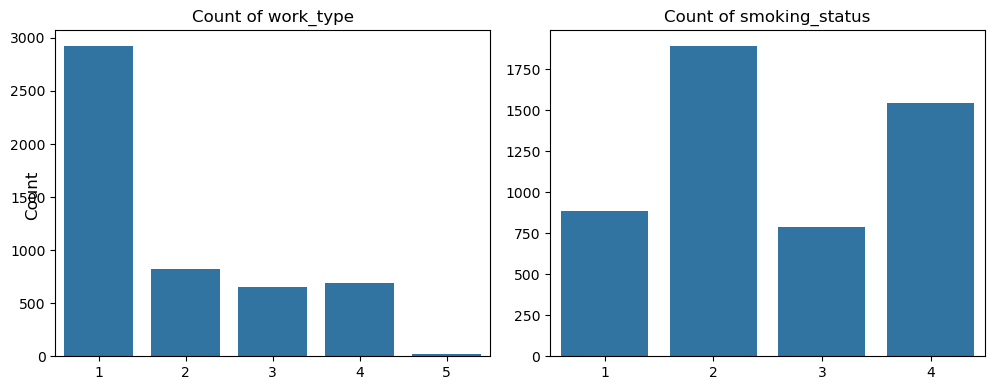

In [27]:
# Select categorical columns
category = df[['work_type', 'smoking_status']]
n_plots = len(category.columns)
n_cols = 3
n_rows = int(math.ceil(n_plots / n_cols))

# Set up grid layout
gs = gridspec.GridSpec(n_rows, n_cols)
fig = plt.figure(figsize=(15, 4))

# Plot each category using countplot
for i, col in enumerate(category.columns):
    ax = fig.add_subplot(gs[i])
    sns.countplot(data=df, x=col, ax=ax)
    ax.set_title(f'Count of {col}')
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.tight_layout()
fig.supylabel('Count')
plt.show()

**Observations**  
- work_type: Most of the individuals fall under "private" and others are mostly evenly distributed in other work_type groups
- smoking_status: Higer number of people fall under "never smoked" and there are high number of uncertainty "unknows"

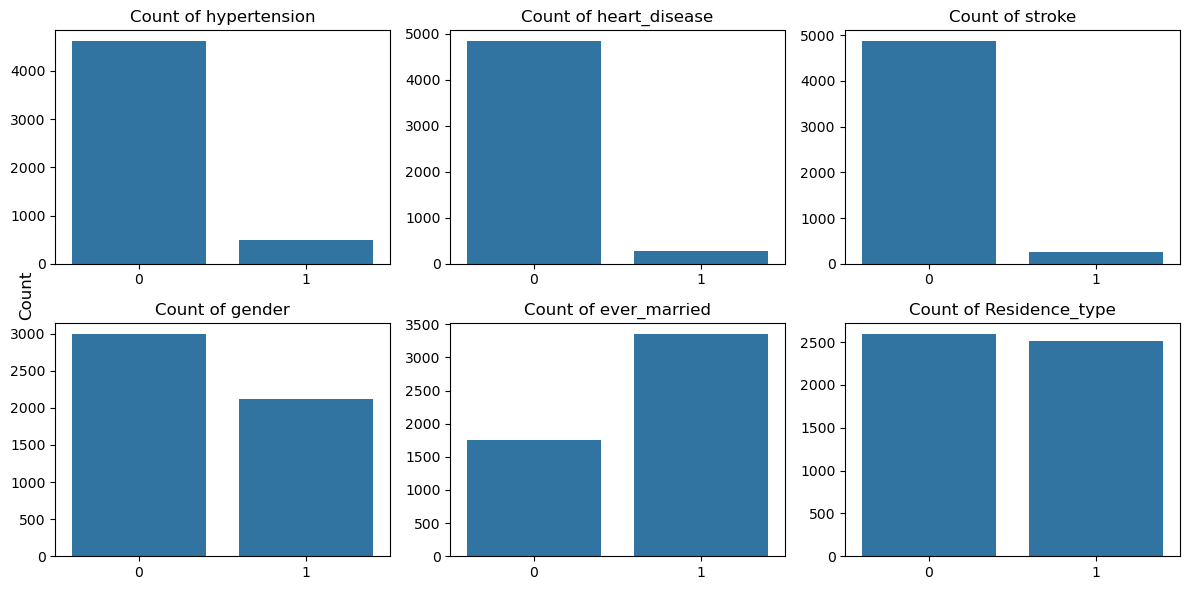

In [68]:
# Select categorical columns
category = df[['hypertension', 'heart_disease', 'stroke', 'gender', 'ever_married', 'Residence_type']]
n_plots = len(category.columns)
n_cols = 3
n_rows = int(math.ceil(n_plots / n_cols))

# Set up grid layout
gs = gridspec.GridSpec(n_rows, n_cols)
fig = plt.figure(figsize=(12, 6))

# Plot each category using countplot
for i, col in enumerate(category.columns):
    ax = fig.add_subplot(gs[i])
    sns.countplot(data=df, x=col, ax=ax)
    ax.set_title(f'Count of {col}')
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.tight_layout()
fig.supylabel('Count')
plt.show()

#### 1.9 Treatment of Outliers  
Using binning on bmi, avg_glucose_level and age  
- Why?
  - Easier to understand categories "young" and "old" than to just look a range of numbers
  - Reduces impact on outliers. Exterme values in bmi or glucose can skew model learning
  - Can help in neutralizing outliers influence by grouping values into broader buckets

In [109]:
df['bmi_cat'] = pd.cut(df['bmi'], bins = [0, 19, 25,30,10000], labels = ['Underweight', 'Ideal', 'Overweight', 'Obesity'])
df['age_cat'] = pd.cut(df['age'], bins = [0,13,18, 45,60,200], labels = ['Children', 'Teens', 'Adults','Mid Adults','Elderly'])
df['glucose_cat'] = pd.cut(df['avg_glucose_level'], bins = [0,90,160,230,500], labels = ['Low', 'Normal', 'High', 'Very High'])
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_cat,age_cat,glucose_cat
0,1,67.0,0,1,1,1,0,228.69,36.600000,1,1,Obesity,Elderly,High
1,0,61.0,0,0,1,2,1,202.21,28.893237,2,1,Overweight,Elderly,High
2,1,80.0,0,1,1,1,1,105.92,32.500000,2,1,Obesity,Elderly,Normal
3,0,49.0,0,0,1,1,0,171.23,34.400000,3,1,Obesity,Mid Adults,High
4,0,79.0,1,0,1,2,1,174.12,24.000000,2,1,Ideal,Elderly,High
5,1,81.0,0,0,1,1,0,186.21,29.000000,1,1,Overweight,Elderly,High
6,1,74.0,1,1,1,1,1,70.09,27.400000,2,1,Overweight,Elderly,Low
7,0,69.0,0,0,0,1,0,94.39,22.800000,2,1,Ideal,Elderly,Normal
8,0,59.0,0,0,1,1,1,76.15,28.893237,4,1,Overweight,Mid Adults,Low
9,0,78.0,0,0,1,1,0,58.57,24.200000,4,1,Ideal,Elderly,Low
